## Sentiment Anylisis Model Gift Cards
### COMP262 - Group 5
### Ruben Ormeno
### Mariela
### Samantha
### Juan
### Jose Muniz


### 1. Dataset data exploration

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import json
import pandas as pd
df = pd.read_json(r'Gift_Cards_5.json',lines = True)

# Field Description
### overall (bigint) – User rating (1-5)
### verified (boolean)  Is the review verified (true, false)
### reviewtime (string) – Timestamp formatted like “10 30, 2009”
### reviewerid (string) – Amazon generated user id
### asin (string) – Unique Amazon generated product id
### reviewername (string) – User supplied name
### reviewtext (string) – Review text
### summary (string) – Summary of Review text
### unixreviewtime (bigint) – Timestamp formatted in epoch time.
### vote (double) – Userful voters form other users
### image -  images that users post after they have received the product

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 258.4+ KB


In [5]:
df.describe()

,overall,unixReviewTime,vote
count,2972.000000,2.972000e+03,208.000000
mean,4.885262,1.476136e+09,5.158654
std,0.484660,3.379616e+07,7.366121
min,1.000000,1.327968e+09,2.000000
25%,5.000000,1.454890e+09,2.000000
50%,5.000000,1.482710e+09,3.000000
75%,5.000000,1.500271e+09,5.000000
max,5.000000,1.534896e+09,60.000000


In [6]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN


## 1a. Counts, averages

In [7]:
def missing_values_analysis(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]  # Columns with missing values
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)  # Number of missing values, sorted
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)  # Percentage of missing values, sorted
    missing_df = pd.concat([n_miss, np.around(ratio, 2)], axis=1, keys=['Missing Values', 'Ratio (%)'])  # Concatenate counts and percentages
    return missing_df
def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print("TYPES".center(82,'~'))
    print(df.dtypes)
    print("MISSING VALUES ANALYSIS".center(82, '~'))
    print(missing_values_analysis(df))
    print("FREQUENCY ANALYSIS".center(82, '~'))
    print(f"Frequency for {'overall'}:".center(82, '-'))
    print(df['overall'].value_counts().head())
    print("\n")
    print("QUANTILES".center(82, '~'))
    try:
        # Calculate quantiles for numeric columns only
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        print(df[numeric_cols].quantile([0, 0.50, 0.75, 1]).T)
    except Exception as e:
        print(f"Error calculating quantiles: {e}")
    if head > 0:
        print("FIRST {} ROWS".format(head).center(82, '~'))
        print(df.head(head))
    if tail > 0:
        print("LAST {} ROWS".format(tail).center(82, '~'))
        print(df.tail(tail))

# You can now call check_dataframe(df) again with this adjusted function.
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 2972
Columns: 12
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
overall             int64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote              float64
image              object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~MISSING VALUES ANALYSIS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            Missing Values  Ratio (%)
image                 2960      99.60
vote                  2764      93.00
style                 2108      70.93
reviewText               6       0.20
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FREQUENCY ANALYSIS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------Frequency for overall:------------------------------
overall
5    2752
4     154
3      33
1      2

In [8]:
# classes by variable

import pandas as pd

def check_class(dataframe):
    unique_counts = []
    for column in dataframe.columns:
        try:
            # Attempt to count unique values in the usual way
            unique_count = dataframe[column].nunique()
        except TypeError:
            # Handle unhashable items by converting them to strings (or another approach as needed)
            unique_count = dataframe[column].astype(str).nunique()
        unique_counts.append(unique_count)

    # Create DataFrame with counts
    nunique_df = pd.DataFrame({'Variable': dataframe.columns, 'Classes': unique_counts})
    nunique_df = nunique_df.sort_values('Classes', ascending=False).reset_index(drop=True)
    return nunique_df
check_class(df)

,Variable,Classes
0,reviewText,1937
1,summary,952
2,reviewTime,797
3,unixReviewTime,797
4,reviewerID,458
5,reviewerName,429
6,asin,148
7,vote,20
8,style,18
9,image,13


## 1b. Distribution of number of reviews across products

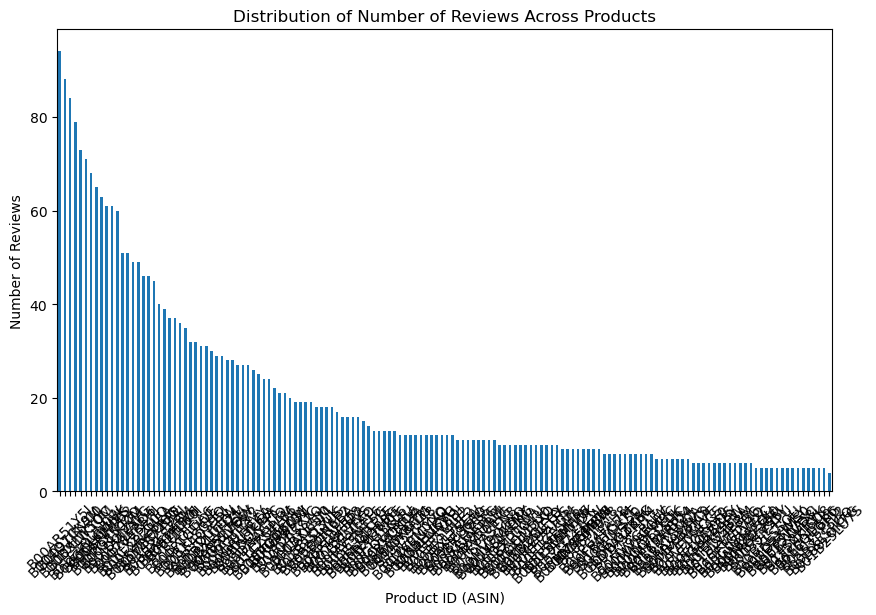

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of reviews per product (ASIN)
review_counts = df['asin'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar')
plt.title('Distribution of Number of Reviews Across Products')
plt.xlabel('Product ID (ASIN)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

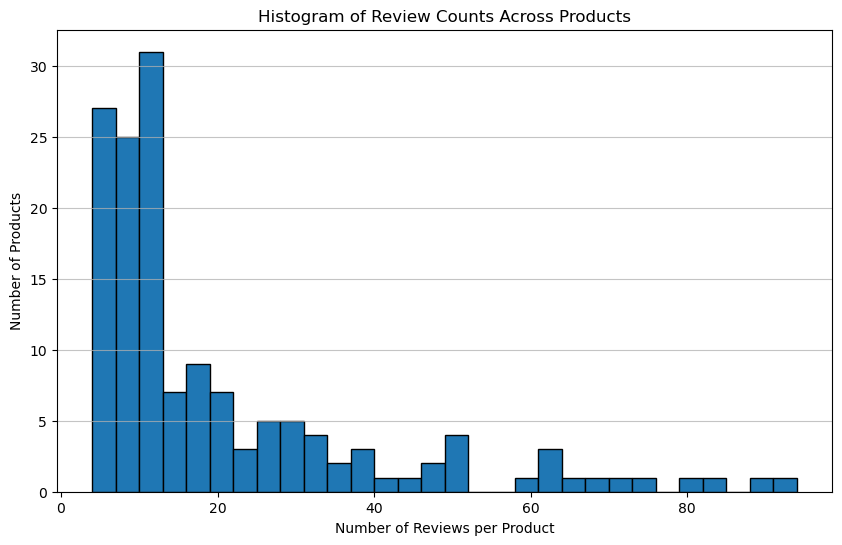

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of reviews per product (ASIN)
review_counts = df['asin'].value_counts()

# Create the histogram plot
plt.figure(figsize=(10, 6))
plt.hist(review_counts, bins=30, edgecolor='black')
plt.title('Histogram of Review Counts Across Products')
plt.xlabel('Number of Reviews per Product')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


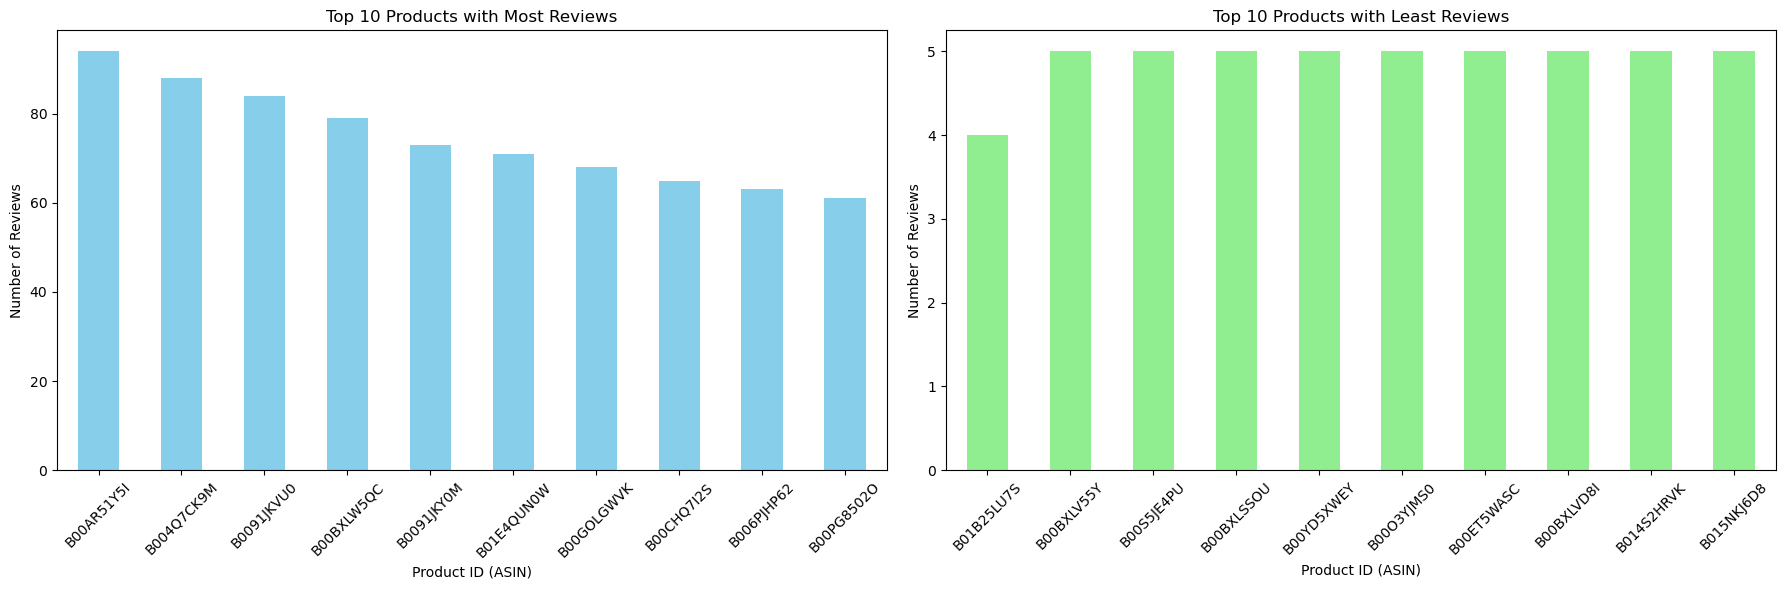

In [11]:
# Calculate the top 10 products with the most reviews
top_reviewed_asins = df['asin'].value_counts().head(10)

# Calculate the top 10 products with the least reviews
least_reviewed_asins = df['asin'].value_counts().nsmallest(10)

# Plotting both top and least reviewed products side by side for comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top reviewed ASINs plot
top_reviewed_asins.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Products with Most Reviews')
axes[0].set_xlabel('Product ID (ASIN)')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=45)

# Least reviewed ASINs plot
least_reviewed_asins.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Products with Least Reviews')
axes[1].set_xlabel('Product ID (ASIN)')
axes[1].set_ylabel('Number of Reviews')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 1c. Distribution of number of reviews per products

/Users/josemuniz/opt/anaconda3/envs/PX39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


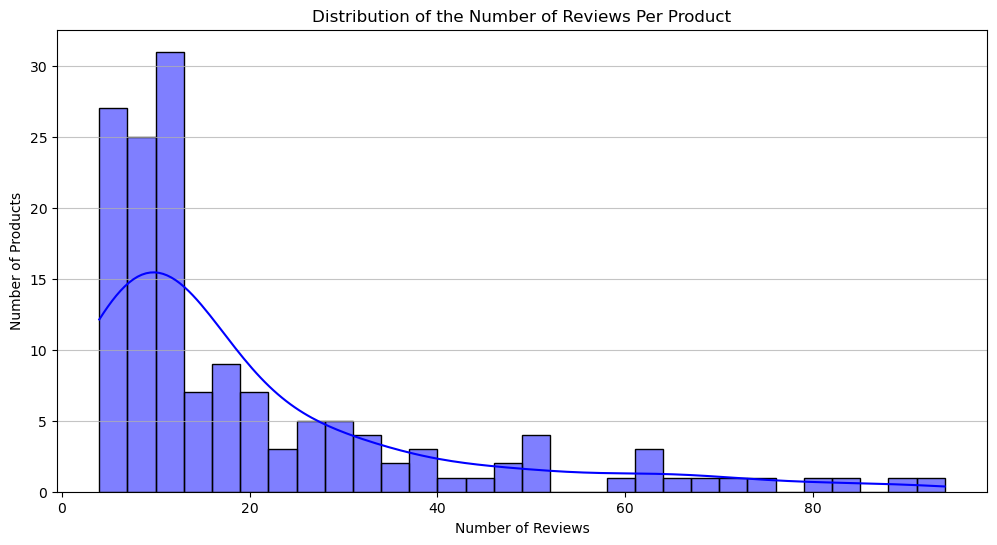

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

reviews_per_product = df['asin'].value_counts()

# plot using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(reviews_per_product, bins=30, kde=True, color='blue')
plt.title('Distribution of the Number of Reviews Per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)

plt.show()


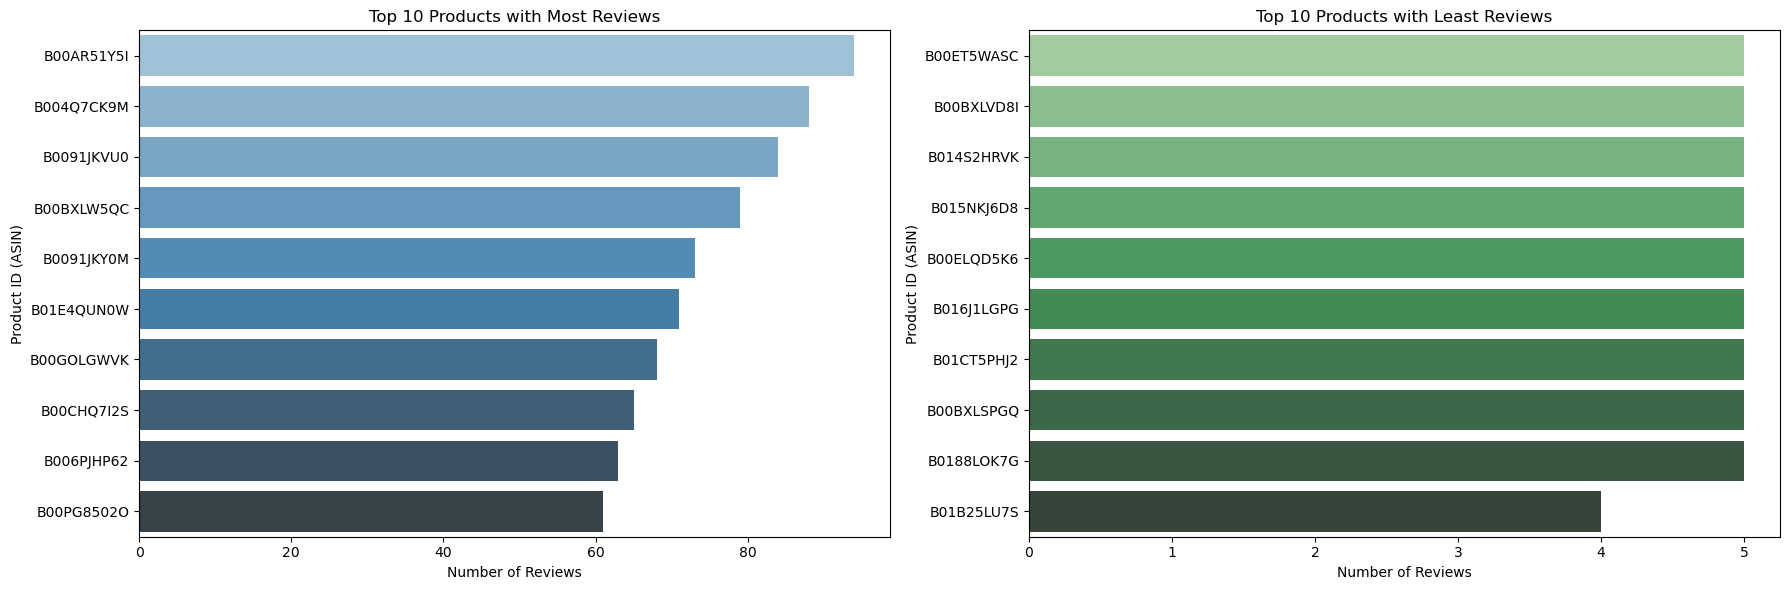

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset information

# Calculate the top 10 products with the most reviews and their counts
top_10_most_reviews = df['asin'].value_counts().head(10)

# Calculate the top 10 products with the least reviews and their counts
top_10_least_reviews = df['asin'].value_counts().tail(10)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for top 10 products with most reviews
sns.barplot(x=top_10_most_reviews.values, y=top_10_most_reviews.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Products with Most Reviews')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Product ID (ASIN)')

# Plot for top 10 products with least reviews
sns.barplot(x=top_10_least_reviews.values, y=top_10_least_reviews.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 10 Products with Least Reviews')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Product ID (ASIN)')

plt.tight_layout()
plt.show()


# 1d. Distribution reviews per user

/Users/josemuniz/opt/anaconda3/envs/PX39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


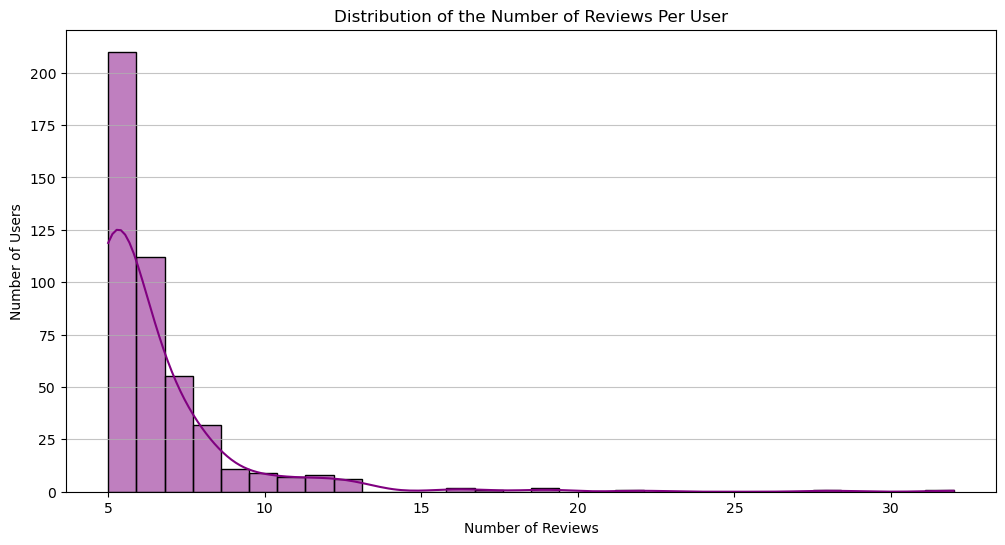

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the number of reviews per user
reviews_per_user = df['reviewerID'].value_counts()

# Plot the distribution of the number of reviews per user using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(reviews_per_user, bins=30, kde=True, color='purple')
plt.title('Distribution of the Number of Reviews Per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)

plt.show()

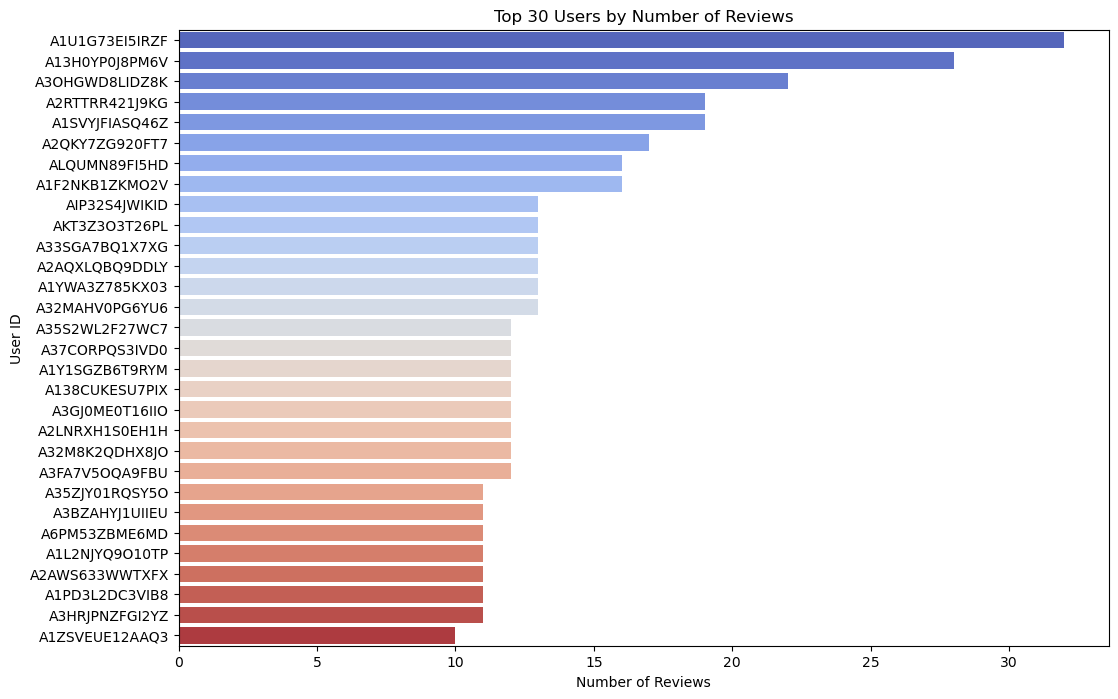

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 30 users with the most reviews and their counts
top_30_users_reviews = df['reviewerID'].value_counts().head(30)

# Plotting the distribution of reviews for the top 30 users
plt.figure(figsize=(12, 8))
sns.barplot(y=top_30_users_reviews.index, x=top_30_users_reviews.values, palette='coolwarm')
plt.title('Top 30 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')

plt.show()

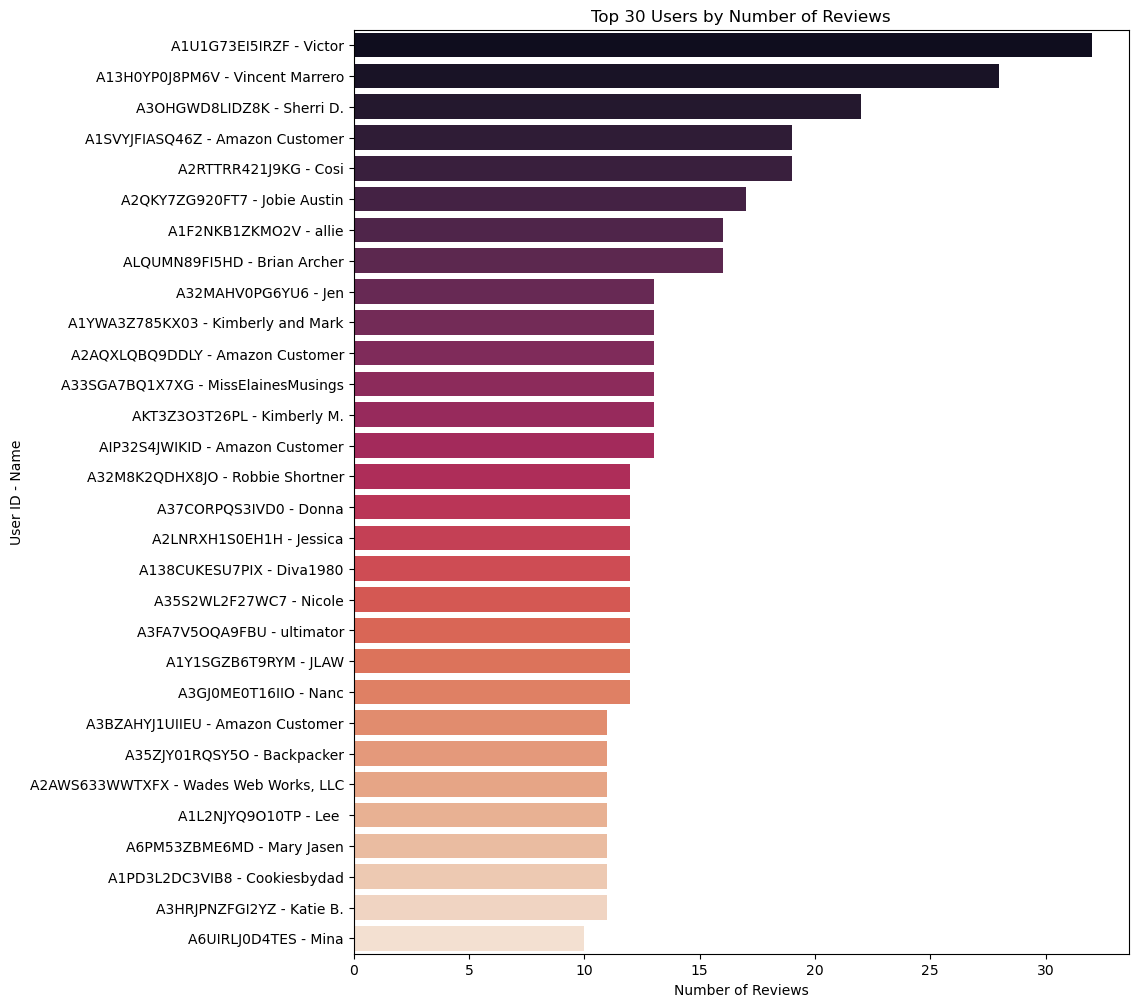

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column that combines 'reviewerID' and 'reviewerName'
df['ID_Name'] = df['reviewerID'] + ' - ' + df['reviewerName']

top_30_combined = df['ID_Name'].value_counts().head(30)

# Plotting
plt.figure(figsize=(10, 12))
sns.barplot(x=top_30_combined.values, y=top_30_combined.index, palette='rocket')
plt.title('Top 30 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID - Name')

plt.show()


## 2.	Text basic pre-processing:

In [17]:
# a. Labeling the data based on ratings
def label_rating(row):
    if row['overall'] >= 4:
        return 'Positive'
    elif row['overall'] == 3:
        return 'Neutral'
    else:  # Ratings 1 and 2
        return 'Negative'

df['rating_label'] = df.apply(label_rating, axis=1)

In [18]:
# Dropping columns 'image', 'vote', and 'style' columns
#df.drop(columns=['image', 'vote', 'style'], inplace=True, errors='ignore')
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ID_Name,rating_label
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN,A31UBHTUUIFJUT - john stoiber,Positive
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN,A2MN5JQMIY0FQ2 - Amazon Customer,Positive
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN,A25POI5IGGENPM - Kindle Customer,Positive
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN,A2HYGTHB4LJ9FW - Amante dei Gatti,Positive
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN,ACDG3M94UMZGJ - Joan Freesh,Positive


In [19]:
# b.	Chose the appropriate columns for your sentiment analyzer
df['reviewText'] = df['reviewText'].fillna('')
df['summary'] = df['summary'].fillna('')

# Combine 'reviewText' and 'summary' into a single column for a comprehensive sentiment analysis
df['combined_text'] = df['reviewText'] + " " + df['summary']

# Print the shape of the DataFrame to see the number of entries and columns
print("DataFrame shape:", df.shape)

# Print the first few rows of the new combined_text column to verify the concatenation
print("\nSample combined text from the first few reviews:")
print(df['combined_text'].head())

# Print a summary of any missing values in the combined_text column
print("\nMissing values in 'combined_text':", df['combined_text'].isnull().sum())

# For text, you might want to look at the distribution of text lengths
print("\nSummary of text lengths in 'combined_text':")
print(df['combined_text'].apply(len).describe())


DataFrame shape: (2972, 15)

Sample combined text from the first few reviews:
0                       Another great gift. Five Stars
1                Gift card for my daughter Ease of use
2                              Nice present Five Stars
3    My niece loved this birthday greeting/gift car...
4                           fine as a gift. Five Stars
Name: combined_text, dtype: object

Missing values in 'combined_text': 0

Summary of text lengths in 'combined_text':
count    2972.000000
mean       83.818641
std       137.925703
min         5.000000
25%        23.000000
50%        40.000000
75%        87.000000
max      2477.000000
Name: combined_text, dtype: float64


In [20]:
# c. Check for outliers in 'reviewText' by word count
df['word_count'] = df['reviewText'].fillna('').apply(lambda x: len(x.split()))
print(df['word_count'].describe())

count    2972.000000
mean       12.792396
std        24.730094
min         0.000000
25%         2.000000
50%         5.000000
75%        14.000000
max       461.000000
Name: word_count, dtype: float64


In [21]:
#show the number of words per review in descending order

df['word_count'].value_counts().sort_index(ascending=False)

word_count
461      1
427      1
381      1
252      1
223      1
      ... 
4      286
3      226
2      404
1      413
0        6
Name: count, Length: 122, dtype: int64

/Users/josemuniz/opt/anaconda3/envs/PX39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


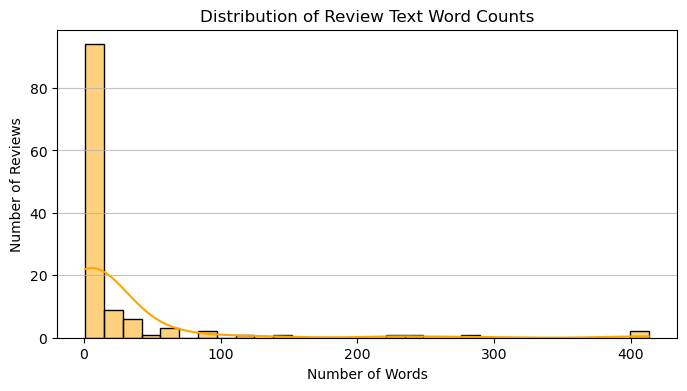

In [22]:
#plotting the distribution of word counts
plt.figure(figsize=(8, 4))
sns.histplot(df['word_count'].value_counts(), bins=30, kde=True, color='orange')
plt.title('Distribution of Review Text Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', alpha=0.75)

plt.show()

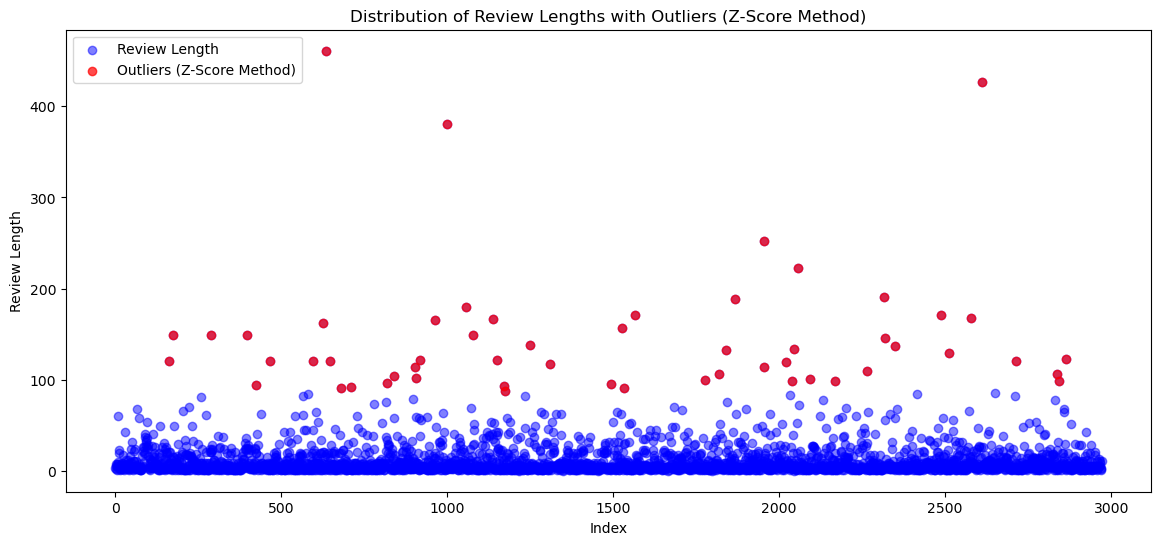

In [23]:
df['z_score'] = (df['word_count'] - df['word_count'].mean()) / df['word_count'].std()

outliers = df[np.abs(df['z_score']) > 3]

# Plotting
plt.figure(figsize=(14, 6))
plt.scatter(df.index, df['word_count'], label='Review Length', color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers['word_count'], label='Outliers (Z-Score Method)', color='red', alpha=0.7)
plt.title('Distribution of Review Lengths with Outliers (Z-Score Method)')
plt.xlabel('Index')
plt.ylabel('Review Length')
plt.legend()
plt.show()

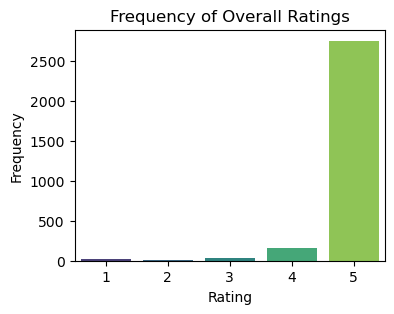

In [24]:
#showing the frequency of overall ratings and rating labels
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each rating
rating_counts = df['overall'].value_counts()

# Plot the frequency of each rating using seaborn
plt.figure(figsize=(4, 3))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Frequency of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()


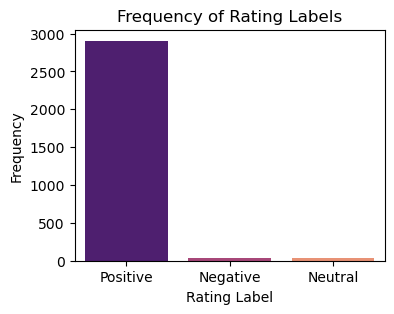

In [25]:
# Count the frequency of each rating label
label_counts = df['rating_label'].value_counts()

# Plot the frequency of each rating label using seaborn
plt.figure(figsize=(4, 3))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='magma')
plt.title('Frequency of Rating Labels')
plt.xlabel('Rating Label')
plt.ylabel('Frequency')

plt.show()


## Comparing Sentiment with Ratings

In [26]:
# Step 1: Perform Sentiment Analysis
# Ensure you have the VADER lexicon downloaded
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for a text
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis on the combined review texts
df['sentiment_score'] = df['combined_text'].apply(get_sentiment_score)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/josemuniz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Step 2: Define Inconsistent Ratings
# Function to determine inconsistency
def is_inconsistent(row):
    if (row['sentiment_score'] > 0.05 and row['overall'] <= 2) or (row['sentiment_score'] < -0.05 and row['overall'] >= 4):
        return 'Inconsistent'
    else:
        return 'Consistent'

# Apply the inconsistency check
df['consistency'] = df.apply(is_inconsistent, axis=1)

In [28]:
# Step 3: Analysis of Inconsistencies
# Display the count of inconsistent vs. consistent reviews
print(df['consistency'].value_counts())

# Optionally, display some inconsistent reviews to manually check
print(df[df['consistency'] == 'Inconsistent'][['overall', 'sentiment_score', 'combined_text']].head())


consistency
Consistent      2901
Inconsistent      71
Name: count, dtype: int64
     overall  sentiment_score  \
29         2           0.8481   
39         5          -0.2626   
95         5          -0.4784   
100        5          -0.0772   
173        5          -0.6360   

                                         combined_text  
29   Ok looking card (not great). But I would have ...  
39   How can you go wrong with a amazon gift certif...  
95   If you are ever stuck on what to get kids (twe...  
100  Once again, who but Donald Trump (perhaps The ...  
173   Delivered as expected, no complaints! Five Stars  


## Step 1: Categorize Inconsistencies

In [29]:
def detailed_inconsistency(row):
    if row['sentiment_score'] > 0.05:
        sentiment = 'Positive'
    elif row['sentiment_score'] < -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    if row['overall'] >= 4:
        rating = 'High'
    elif row['overall'] <= 2:
        rating = 'Low'
    else:
        rating = 'Medium'
    
    if (sentiment == 'Positive' and rating == 'Low') or (sentiment == 'Negative' and rating == 'High'):
        return f'Inconsistent: {sentiment} sentiment with {rating} rating'
    else:
        return 'Consistent'

# Apply the detailed inconsistency function
df['detailed_consistency'] = df.apply(detailed_inconsistency, axis=1)


## Step 2: Analyze Detailed Inconsistencies

In [30]:
# Filter out and display detailed inconsistencies
inconsistent_reviews = df[df['detailed_consistency'].str.startswith('Inconsistent')]
print(inconsistent_reviews[['overall', 'sentiment_score', 'combined_text', 'detailed_consistency']].head())


     overall  sentiment_score  \
29         2           0.8481   
39         5          -0.2626   
95         5          -0.4784   
100        5          -0.0772   
173        5          -0.6360   

                                         combined_text  \
29   Ok looking card (not great). But I would have ...   
39   How can you go wrong with a amazon gift certif...   
95   If you are ever stuck on what to get kids (twe...   
100  Once again, who but Donald Trump (perhaps The ...   
173   Delivered as expected, no complaints! Five Stars   

                                  detailed_consistency  
29    Inconsistent: Positive sentiment with Low rating  
39   Inconsistent: Negative sentiment with High rating  
95   Inconsistent: Negative sentiment with High rating  
100  Inconsistent: Negative sentiment with High rating  
173  Inconsistent: Negative sentiment with High rating  


## Step 3: Summary of Detailed Inconsistencies

In [31]:
# Get a count of each detailed inconsistency type
inconsistency_counts = inconsistent_reviews['detailed_consistency'].value_counts()
print(inconsistency_counts)


detailed_consistency
Inconsistent: Negative sentiment with High rating    55
Inconsistent: Positive sentiment with Low rating     16
Name: count, dtype: int64


VADER Inconsistency Results:

Inconsistent: Negative sentiment with High rating: VADER found a negative sentiment in 55 cases where the user rating was high, suggesting that the sentiment expressed in the text was not in line with the high rating given by the users.
Inconsistent: Positive sentiment with Low rating: VADER found a positive sentiment in 16 cases where the user rating was low, indicating that the sentiment expressed in the text was more positive than the low rating might suggest.

Accuracy between rating sentiment and lexicon sentiment: 0.7139973082099597
F1 score between rating sentiment and lexicon sentiment: 0.33572441490138827


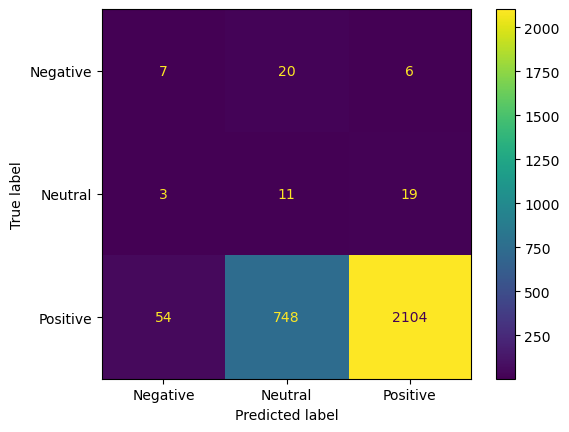

In [33]:
# ... [previous code]
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the positive and negative lexicons into dataframes
# Make sure to replace the file paths with the correct paths where your lexicon files are located
pos_df = pd.read_csv("positive-words.txt", header=None, names=["words"], encoding='latin1')
neg_df = pd.read_csv("negative-words.txt", header=None, names=["words"], encoding='latin1')

# Convert the lexicons to sets for faster lookup
positive_words = set(pos_df['words'].str.strip())
negative_words = set(neg_df['words'].str.strip())

# Function to calculate sentiment based on lexicons
def calculate_lexicon_sentiment(text):
    # Tokenize and lowercase the text
    tokens = text.lower().split()
    # Count occurrences of positive and negative words
    pos_count = sum(token in positive_words for token in tokens)
    neg_count = sum(token in negative_words for token in tokens)
    # Calculate percentages of positive and negative words
    total_count = len(tokens)
    pos_percent = pos_count / total_count if total_count > 0 else 0
    neg_percent = neg_count / total_count if total_count > 0 else 0
    # Determine the sentiment based on the higher percentage
    if pos_percent > neg_percent:
        return 'Positive'
    elif neg_percent > pos_percent:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment calculation to each review
df['lexicon_sentiment'] = df['reviewText'].fillna('').apply(calculate_lexicon_sentiment)

# Now compare the lexicon sentiment with the given ratings
# 
df['rating_sentiment'] = df['overall'].apply(lambda x: 'Positive' if x >= 4 else ('Negative' if x <= 2 else 'Neutral'))

# Calculate accuracy and F1 score between lexicon sentiment and rating sentiment
accuracy = accuracy_score(df['rating_sentiment'], df['lexicon_sentiment'])
f1 = f1_score(df['rating_sentiment'], df['lexicon_sentiment'], average='macro')

print(f'Accuracy between rating sentiment and lexicon sentiment: {accuracy}')
print(f'F1 score between rating sentiment and lexicon sentiment: {f1}')

# You can also plot a confusion matrix to see the comparison visually
conf_matrix = confusion_matrix(df['rating_sentiment'], df['lexicon_sentiment'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()
plt.show()


Accuracy: The accuracy of approximately 71.4% indicates that the sentiment determined by the lexicon matches the user ratings about 71.4% of the time. This is a decent accuracy rate but suggests room for improvement.

F1 Score: The F1 score of approximately 33.6% is quite low. The F1 score is a harmonic mean of precision and recall and is a better measure when the class distribution is imbalanced. A low F1 score indicates that the model has limited precision and/or recall

The confusion matrix suggests that the lexicon-based model is better at identifying positive sentiments than negative or neutral.

The large number of false neutrals for positive ratings also suggests that the threshold for classifying positive sentiment might need to be adjusted.


In [34]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,ID_Name,rating_label,combined_text,word_count,z_score,sentiment_score,consistency,detailed_consistency,lexicon_sentiment,rating_sentiment
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,...,A31UBHTUUIFJUT - john stoiber,Positive,Another great gift. Five Stars,3,-0.395971,0.7906,Consistent,Consistent,Positive,Positive
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,...,A2MN5JQMIY0FQ2 - Amazon Customer,Positive,Gift card for my daughter Ease of use,5,-0.315098,0.6597,Consistent,Consistent,Neutral,Positive
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,...,A25POI5IGGENPM - Kindle Customer,Positive,Nice present Five Stars,2,-0.436407,0.4215,Consistent,Consistent,Positive,Positive
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,...,A2HYGTHB4LJ9FW - Amante dei Gatti,Positive,My niece loved this birthday greeting/gift car...,7,-0.234225,0.8442,Consistent,Consistent,Positive,Positive
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,...,ACDG3M94UMZGJ - Joan Freesh,Positive,fine as a gift. Five Stars,4,-0.355534,0.5719,Consistent,Consistent,Positive,Positive


In [45]:
rating_vader_consistency = df['consistency'].value_counts()
print(rating_vader_consistency)

consistency
Consistent      2901
Inconsistent      71
Name: count, dtype: int64


In [46]:
rating_vader_detailed_consistency = df['detailed_consistency'].value_counts()
print(rating_vader_detailed_consistency)

detailed_consistency
Consistent                                           2901
Inconsistent: Negative sentiment with High rating      55
Inconsistent: Positive sentiment with Low rating       16
Name: count, dtype: int64


In [48]:
rating_lexicon_sentiment = df['lexicon_sentiment'].value_counts()
print(rating_lexicon_sentiment)

lexicon_sentiment
Positive    2129
Neutral      779
Negative      64
Name: count, dtype: int64


In [49]:
rating_lexicon = df['rating_sentiment'].value_counts()
print(rating_lexicon)

rating_sentiment
Positive    2906
Negative      33
Neutral       33
Name: count, dtype: int64


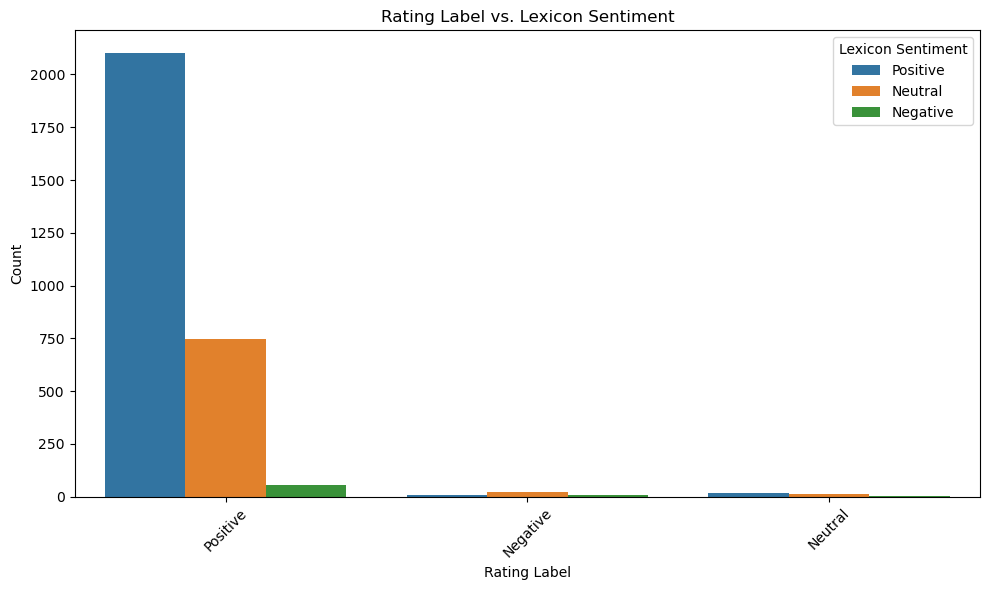

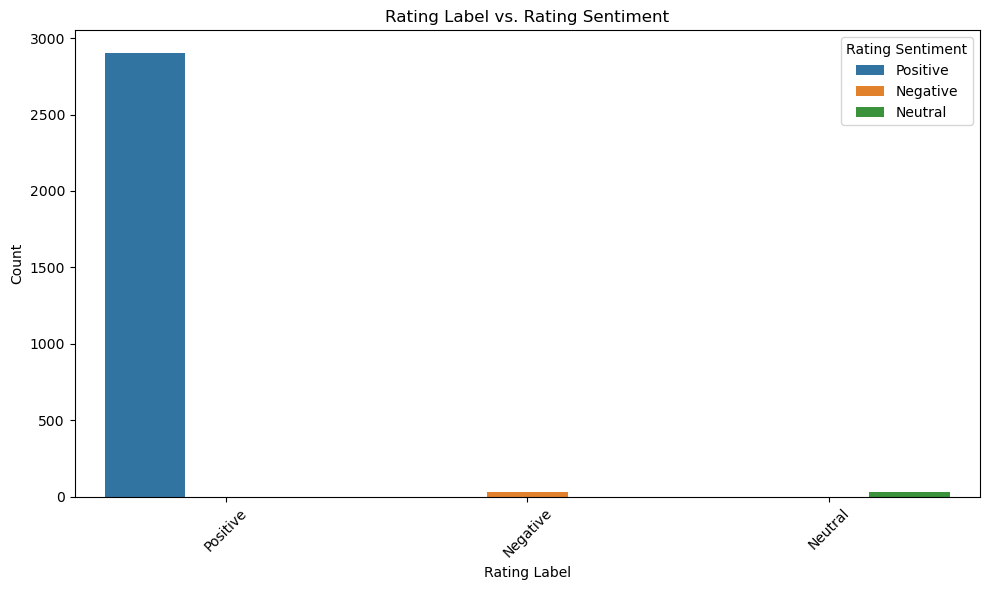

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Rating Label vs. Lexicon Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='rating_label', hue='lexicon_sentiment', data=df)
plt.title('Rating Label vs. Lexicon Sentiment')
plt.xlabel('Rating Label')
plt.ylabel('Count')
plt.legend(title='Lexicon Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Rating Label vs. Rating Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='rating_label', hue='rating_sentiment', data=df)
plt.title('Rating Label vs. Rating Sentiment')
plt.xlabel('Rating Label')
plt.ylabel('Count')
plt.legend(title='Rating Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()